<a href="https://colab.research.google.com/github/Ancy-padmanabhan/Assignments/blob/main/Statistics_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('Students_Performance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [3]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [4]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<Axes: title={'center': 'Gender'}, ylabel='gender'>

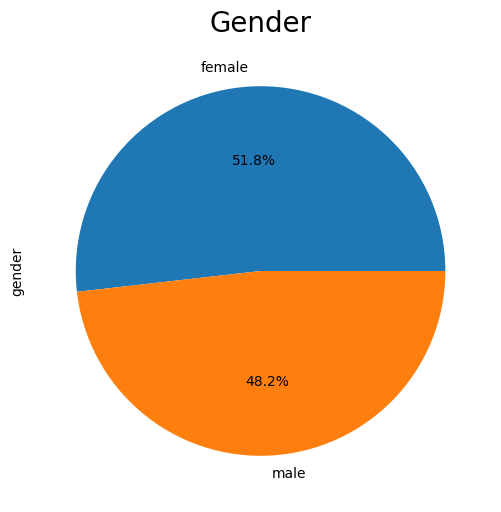

In [5]:
#Find out how many males and females participated in the test.
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('Gender',fontsize = 20)
data['gender'].value_counts().plot.pie(autopct="%1.1f%%")

In [6]:
#The count of Male and Female students who attended the test
print("The number of Female and Male participation In the test")
print(data['gender'].tolist().count('female'))
print(data['gender'].tolist().count('male'))

The number of Female and Male participation In the test
518
482


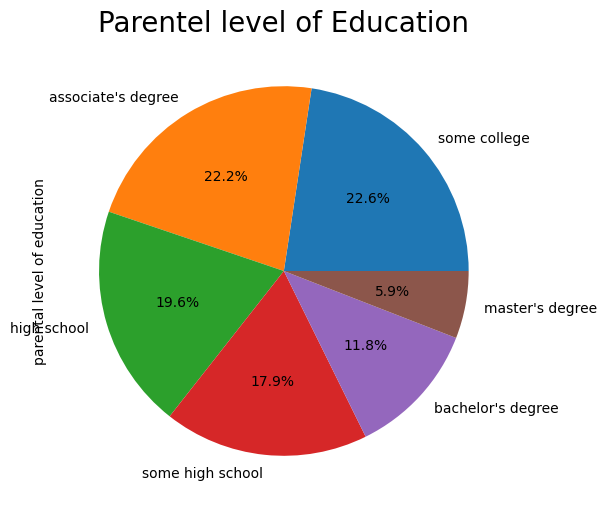

In [7]:
#What do you think about the students' parental level of education?
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('Parentel level of Education',fontsize = 20)
data['parental level of education'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

The parents with masters degree are low in number but after comparing the scores of students those parent's students have performed well in the test. It is explained with bar diagram in this notebook, Please refer next diagram.

In [8]:
#Who scores the most on average for math, reading and writing based on Gender
data1 = data.groupby(['gender','parental level of education'])[['reading score', 'math score', 'writing score']].mean()
data1.head()

reading score  math score  writing score
gender parental level of education                                          
female associate's degree               74.120690   65.250000      74.000000
       bachelor's degree                77.285714   68.158730      78.380952
       high school                      68.202128   58.840426      66.691489
       master's degree                  76.805556   66.500000      77.638889
       some college                     73.550847   65.186441      74.050847

<Axes: ylabel='gender,parental level of education'>

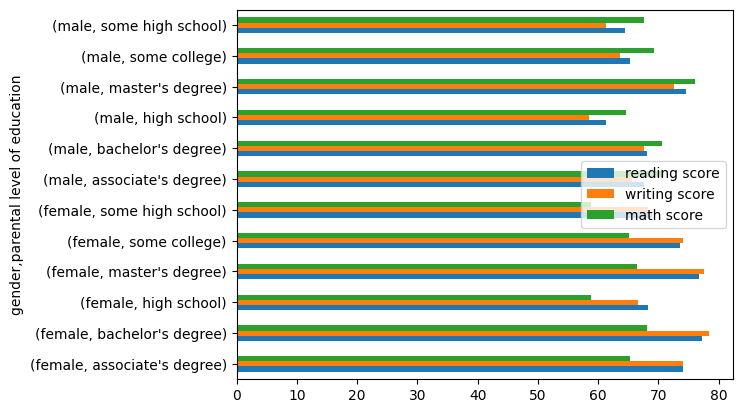

In [9]:
#The chart showing the relation between the scores,gender and parental level of education
data1[['reading score', 'writing score', 'math score']].plot.barh()

The average score for the tests in reading and writing is topped by females wheare as math score average is topped by Male students.The students with parental level of education masters degree scored well in both genders.

In [10]:
##Who scores the most on average for math, reading and writing based on Test preparation course
data2=data.groupby(['test preparation course'])[['reading score','math score','writing score']].mean()
data2.head()

,reading score,math score,writing score
test preparation course,,,
completed,74.175978,69.96648,74.684358
none,66.417445,63.78972,64.457944


The average score is higher for the students who have completed the test preparation course.

In [11]:
#What do you think about the scoring variation for math, reading and writing based on Gender
print(f"Variance based on Gender\n",data.groupby('gender').var(numeric_only=True))

Variance based on Gender
         math score  reading score  writing score
gender                                          
female  256.958593     207.677438     220.369327
male    211.889097     200.211010     202.413924


In [12]:
#What do you think about the scoring variation for math, reading and writing based on Test preparation course
print(f"Variance based on Test preparation course\n",data.groupby('test preparation course').var(numeric_only=True))

Variance based on Test preparation course
                          math score  reading score  writing score
test preparation course                                          
completed                210.884027     183.265864     175.202612
none                     246.668662     213.419851     226.251739


In [13]:
#The management needs your help to give bonus points to the top 25% of students based on their math score,so how will you help the management to achieve this.
data.quantile(q=0.75)

<ipython-input-13-59a4bc5d3a14>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.quantile(q=0.75)


math score       77.00
reading score    79.25
writing score    79.00
Name: 0.75, dtype: float64

In [15]:
df = data[data['math score'] > 77.00 ]
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
430,female,group A,some college,standard,completed,78,87,91
431,female,group B,bachelor's degree,free/reduced,none,78,79,76
432,female,group D,bachelor's degree,standard,none,78,82,79
433,female,group D,high school,standard,none,78,81,80
434,female,group D,bachelor's degree,free/reduced,none,78,90,93


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 430 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       231 non-null    object
 1   race/ethnicity               231 non-null    object
 2   parental level of education  231 non-null    object
 3   lunch                        231 non-null    object
 4   test preparation course      231 non-null    object
 5   math score                   231 non-null    int64 
 6   reading score                231 non-null    int64 
 7   writing score                231 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 24.3+ KB
